In [71]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture


In [72]:
# importing the pkl file
df = pd.read_pickle('./SMAI-Dataset-problem-4.3/colors.pkl')
print(df.shape)

(100, 2)


In [73]:
# printing the likely color components

gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=0)
gmm.fit(df)

means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

print("Means: ", means)
print("Covariances: ", covariances)
print("Weights: ", weights)


Means:  [[ 1.27172922e+02  1.26605367e+02]
 [ 2.55165668e+02  1.27358500e+02]
 [ 2.67439699e-01  2.54518161e+02]
 [ 9.95904977e-02  1.26934805e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 1.26931688e+02  2.54851953e+02]]
Covariances:  [[[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]]
Weights:  [0.2  0.17 0.09 0.17 0.15 0.14 0.08]


In [74]:
from scipy.stats import multivariate_normal
def plot_gaussian(mean, cov):

    # Create a grid of points
    x, y = np.meshgrid(np.linspace(-2* mean[0], 2* mean[0], 500), np.linspace(-2* mean[1], 2* mean[1] , 500)) # some plots seem to have a wall of sorts. this is because the range of x 
    # or y is too small. so some axis gets more stretched than the other
    pos = np.dstack((x, y))

    # Create a multivariate Gaussian distribution
    rv = multivariate_normal(mean=mean, cov=cov)

    pdf_at_mean = rv.pdf(mean)

    # Plot the 3D surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, rv.pdf(pos), cmap='viridis')
    ax.text(mean[0], mean[1], pdf_at_mean, f'Peak (PDF={pdf_at_mean:.2f})', color='red', fontsize=12, ha='center')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('PDF')
    plt.title('3D Surface Plot of Gaussian Distribution with Mean = ' + str(mean) + ' and Covariance = ' + str(cov))
    plt.show()


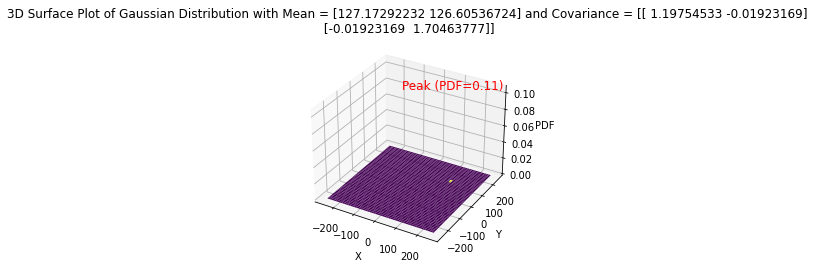

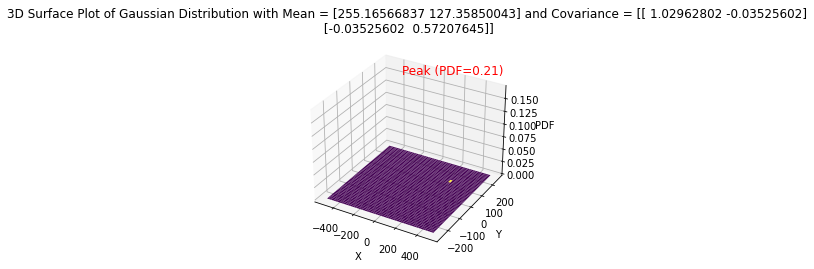

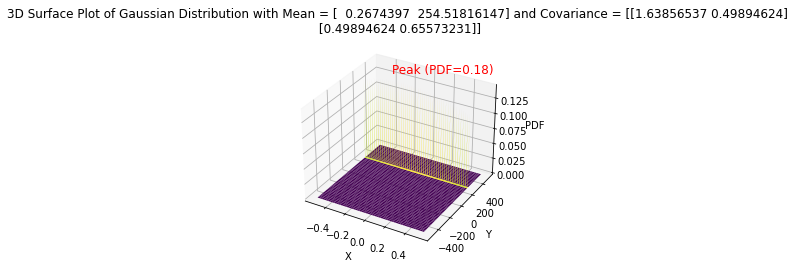

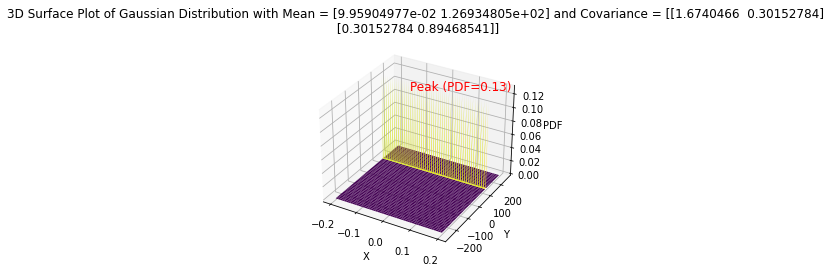

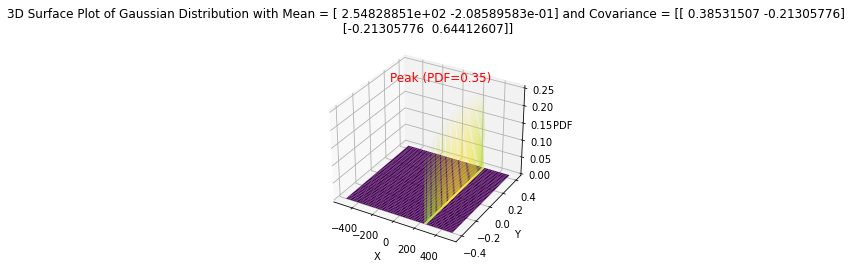

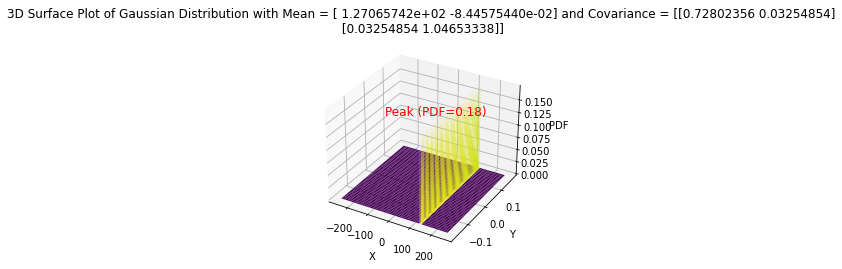

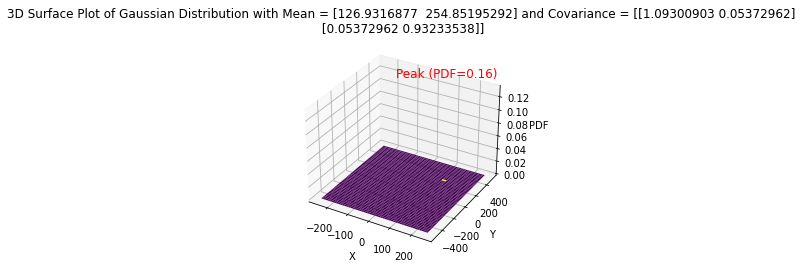

In [75]:
for i in range(means.shape[0]):
    plot_gaussian(means[i], covariances[i])

In [76]:
# generating sample dataset function
def generate_dataset(n_components, mean, covarianc):
    X = []
    for i in range(n_components):
        X.append(np.random.multivariate_normal(mean[i], covarianc[i], 100))
    X = np.array(X)
    X = X.reshape(n_components*100, 2)
    return X

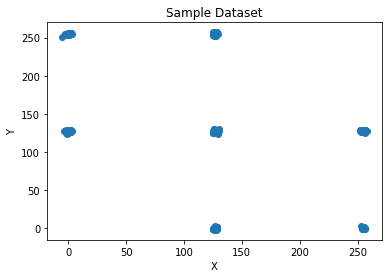

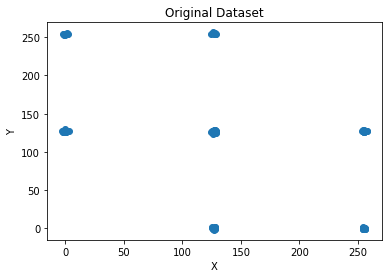

In [78]:
sample_dataset = generate_dataset(7, means, covariances) #using the same means and covariances as above

# plotting the sample dataset
plt.scatter(sample_dataset[:,0], sample_dataset[:,1])
plt.title('Sample Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plotting the original dataset
plt.scatter(df[:,0], df[:,1])
plt.title('Original Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### The dataset generated by our function is nearly same as the dataset provided.